<a href="https://colab.research.google.com/github/Azitt/ML_pytorch_Audioprocessing/blob/main/ML_approximator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We can use a neural network to approximate a function:


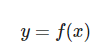

x is a (1-dimensional) sample, and y is the (1-dimensional) target (called regression).
This function could be, for instance, an audio signal like a tone, which would be a sinusoidal function. Here, x would be the time dimension, and y would be a audio value for the given time.

**torch.sin()** function, which directly produces a torch tensor, and also a **torch.randn()** function, which produces random numbers according to a gaussian distribution with zero mean and unit variance. We can use this to simulate microphone and pickup noise

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
device='cpu'

X.shape before view torch.Size([40])
X.shape after view torch.Size([40, 1])


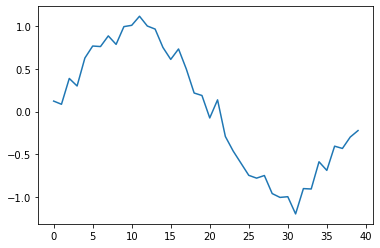

In [17]:
N=40 #number of samples in our signal
#Training set:
#The x input here is the time:
X=torch.arange(0,N,1.0) #generates N time steps for X
print("X.shape before view",X.shape)
X=X.view(N,1) #adding the last dimension for the signal (1 sample each),
print("X.shape after view",X.shape)
#first dimension for the batch of size N
Y=torch.sin(X*3.14/N*2)+torch.randn(X.shape)*0.1 # sinusoid in our training set, plus noise
plt.plot(X,Y)

To see how robust our network is against the **noise** in the training set, we also add new noise.

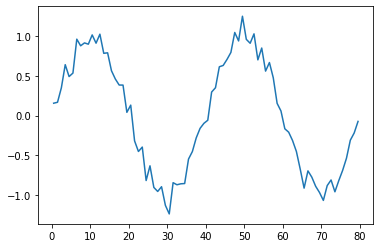

In [8]:
#Validation set, to test generalization, with new noise:
Xval=torch.arange(0.5,2*N,1.0) #generates 2N time steps for X for extrapolation beyond N,
#shifted by 0.5 compared to training set,
#for interpolation between the original sample points.
Xval=Xval.view(2*N,1)
#Validation Target:
Yval=torch.sin(Xval*3.14/N*2)+torch.randn(Xval.shape)*0.1
plt.plot(Xval,Yval)

# Creating 3 layers NN for function approximation

In [9]:
Nodes=10 #This results in a smooth interpolation
#Nodes=80 #this can result in over-fitting

#A 2-layer fully connected network, 1 input (time value), 
#hidden layer has N nodes, 1 output (function value).

class LinNet(nn.Module):
 #define and initialize the layers:
 def __init__(self):
  super(LinNet, self).__init__()
 # Define the model. 
  self.layer1=nn.Sequential(nn.Linear(in_features=1,out_features=Nodes, bias=True))
  self.layer2=nn.Sequential(nn.Linear(in_features=Nodes,out_features=1, bias=True))
 #self.act = nn.LeakyReLU() #non-linear activation function
 #self.act = nn.ReLU() #non-linear activation function
 #self.act = nn.Hardtanh() #non-linear activation function
  self.act = nn.Sigmoid() #non-linear activation function
 #Putting the network together:
 def forward(self, x):
  out = self.layer1(x)
 #print("out.shape=", out.shape)
  out = self.act(out) #comment out if not desired
 #print("out.shape=", out.shape)
  out = self.layer2(out)
 #print("out.shape=", out.shape)
  return out

In [11]:
#create network object:
model = LinNet().to(device)
#Before training:
Ypred=model(X) #the model produces prediction output
print("Ypred.shape=", Ypred.shape)
weights = model.state_dict()   #read obtained weights
print("initial weights=", weights)  #see the random initialization of the weights 
   
#print("model.parameters()=", model.parameters()) 
   

loss_fn = nn.MSELoss() #mean squared error loss
print("Define loss function:",loss_fn)  

#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())
#optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
print("Define optimizer:",optimizer)

Ypred.shape= torch.Size([40, 1])
initial weights= OrderedDict([('layer1.0.weight', tensor([[ 9.8306e-01],
        [-5.7012e-01],
        [-2.1639e-02],
        [-2.9724e-02],
        [-8.6372e-01],
        [ 5.4053e-01],
        [-5.1311e-01],
        [-6.8021e-04],
        [-1.0365e-02],
        [-2.2349e-01]])), ('layer1.0.bias', tensor([ 0.3876, -0.6618,  0.1254, -0.3037,  0.6834, -0.7912, -0.0337, -0.3358,
        -0.9357, -0.3930])), ('layer2.0.weight', tensor([[-0.2707,  0.0788,  0.1982,  0.2502, -0.0956, -0.2296,  0.0925, -0.1149,
          0.1713, -0.2798]])), ('layer2.0.bias', tensor([-0.0581]))])
Define loss function: MSELoss()
Define optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [12]:
for epoch in range(10000):
    Ypred=model(X) #the model produces prediction output
    loss=loss_fn(Ypred, Y) #prediction and target compared by loss
    if epoch%1000==0:
        print(epoch, loss.item()) #print current loss value
    optimizer.zero_grad() #optimizer sets previous gradients to zero
    loss.backward() #optimizer computes new gradients
    optimizer.step() #optimizer updates weights

0 0.682529091835022
1000 0.11934949457645416
2000 0.07285575568675995
3000 0.05709696561098099
4000 0.04118255898356438
5000 0.023348648101091385
6000 0.013685840182006359
7000 0.010523431934416294
8000 0.009546413086354733
9000 0.009029332548379898


In [13]:
weights = model.state_dict()   #read obtained weights
print("obtained weights=", weights)  #see the random initialization of the weights

obtained weights= OrderedDict([('layer1.0.weight', tensor([[ 2.4913],
        [-0.2881],
        [-0.1285],
        [-0.4891],
        [-0.3134],
        [ 0.2228],
        [-0.2179],
        [ 0.2053],
        [ 0.1567],
        [-0.5959]])), ('layer1.0.bias', tensor([-2.7691,  4.0186,  1.2179,  0.1741,  3.7288, -5.6062,  4.2216, -4.3923,
        -5.7777,  0.9499])), ('layer2.0.weight', tensor([[-0.5538,  1.9261,  0.3861,  0.3919, -2.4708, -1.0875,  1.8647, -1.0341,
          4.3107, -2.1566]])), ('layer2.0.bias', tensor([-0.0752]))])


for plotting we need numpy array,hence we need to convert from pytorch tensors to numpy array, which we do with the function **.detach.numpy()**.

In [15]:
Ypred=model(X) # Make Predictions based on the obtained weights 
#print("Ypred training set=", Ypred) 
loss=loss_fn(Ypred, Y)
print("Loss on trainig set:", loss.detach().numpy())

Yvalpred=model(Xval) # Make Predictions based on the obtained weights 
#print("Y validation set=", Yvalpred.detach().numpy()) 
loss=loss_fn(Yvalpred[:N,:], Yval[:N,:])
print("Loss on validation set:", loss.detach().numpy())

Loss on trainig set: 0.008573353
Loss on validation set: 0.012843949
